In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/metadata.csv' #zainab's
file_path1='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/metadata_test.csv' #zainab's
file_path2='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/metadata_kaggle.csv' #zainab's
#file_path='/content/drive/My Drive/Course Dataset/metadata.csv' #kirti's
#file_path1='/content/drive/My Drive/Course Dataset/metadata_test.csv' #kirti's
#file_path2='/content/drive/My Drive/Course Dataset/metadata_kaggle.csv' #kirti's

df_metadata=pd.read_csv(file_path)
df_metadata_test=pd.read_csv(file_path1)
df_metadata_kaggle=pd.read_csv(file_path2)

Mounted at /content/drive


In [4]:
df_metadata.describe(include='all')

,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
count,6310,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,...,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310
unique,6310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,525_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2452
mean,NaN,76.485875,0.768275,0.764064,99.820285,4.336914,25.731720,5.958079,10.365680,13.045253,...,-0.041709,0.293695,99.820285,3.808140,18.444842,4.450493,10.972452,12.015277,-7.857530,NaN
std,NaN,432.751791,4.248967,4.332578,3.428416,2.631348,27.860759,3.096221,6.595222,5.492332,...,2.277088,2.170469,3.428416,1.985834,17.531640,1.853362,4.656772,4.329347,5.706378,NaN
min,NaN,-1083.170000,-14.920000,-10.831700,3.000000,0.015658,0.000245,0.064452,-7.590000,0.110000,...,-8.065000,-7.954800,3.000000,0.019697,0.000388,0.166922,-7.590000,0.340000,-19.800000,NaN
25%,NaN,-172.590000,-1.535000,-1.727375,100.000000,2.437640,5.942087,3.333483,5.430000,8.010000,...,-1.320000,-0.800603,100.000000,2.680783,7.186598,3.271888,8.199450,9.275456,-11.645397,NaN
50%,NaN,18.435000,0.095171,0.188050,100.000000,4.092620,16.749539,5.383670,10.000000,13.590000,...,-0.286027,0.046173,100.000000,3.601205,12.968675,4.039206,11.413852,12.220000,-7.500000,NaN
75%,NaN,368.482500,3.405000,3.693025,100.000000,5.826127,33.943760,8.102191,16.470000,18.730000,...,1.127500,1.468171,100.000000,4.954620,24.548258,5.577271,14.437569,15.430000,-4.440233,NaN


In [ ]:
# Extract features and target
X = df_metadata.drop(columns=['activity', 'user_snippet'])  # Features (excluding 'activity' and 'user_snippet')
y = df_metadata['activity']

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train

,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,x-axis__minimum,...,z-axis__sum_values,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum
1593,-77.72,-0.800,-0.7772,100.0,2.727981,7.441882,2.836533,7.44,7.44,-7.25,...,50.327184,0.572055,0.503272,100.0,4.558894,20.783518,4.586589,15.854085,15.854085,-10.188020
5710,-183.20,-1.840,-1.8320,100.0,1.675826,2.808394,2.482865,2.26,6.70,-6.70,...,180.578571,1.627632,1.805786,100.0,2.343653,5.492710,2.958644,8.076866,8.076866,-7.082581
613,-930.24,-8.260,-9.3024,100.0,5.547572,30.775552,10.830983,1.14,19.57,-19.57,...,-296.380000,-2.470000,-2.963800,100.0,3.938981,15.515568,4.929470,9.110000,16.630000,-16.630000
1954,172.18,1.650,1.7218,100.0,5.338722,28.501955,5.609505,16.17,16.17,-13.99,...,179.325499,2.260978,1.793255,100.0,3.346062,11.196134,3.796301,8.308413,8.308413,-4.794363
4693,-184.04,-1.230,-1.8404,100.0,4.953677,24.538916,5.284505,5.67,15.98,-15.98,...,52.850000,0.230000,0.528500,100.0,4.544060,20.648485,4.574691,15.170000,15.170000,-6.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-136.22,-1.500,-1.3622,100.0,0.766387,0.587349,1.562990,1.84,3.30,-3.30,...,133.601990,1.184970,1.336020,100.0,1.025132,1.050896,1.683997,3.909040,3.909040,-2.220117
5191,-97.55,-1.440,-0.9755,100.0,3.183106,10.132163,3.329229,6.82,7.70,-7.70,...,-43.480000,-1.205000,-0.434800,100.0,4.504903,20.294153,4.525837,16.090000,16.090000,-7.460000
5226,693.22,7.545,6.9322,100.0,5.409544,29.263163,8.793097,18.62,18.62,-4.63,...,-10.710000,-1.245000,-0.107100,100.0,4.008920,16.071441,4.010350,17.430000,17.430000,-4.520000
5390,-63.73,-0.555,-0.6373,100.0,2.896201,8.387978,2.965490,5.94,9.72,-9.72,...,94.760000,0.745000,0.947600,100.0,3.256845,10.607036,3.391899,17.010000,17.010000,-6.700000


In [ ]:
# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, random_state=42)


In [ ]:
# Train the model
gbm.fit(X_train, y_train)

# Predict on the test set
y_pred = gbm.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9405705229793978


In [ ]:
df_metadata_test.head()

,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
0,3006_0,190.60,1.365,1.9060,100.0,6.192680,38.349290,6.479362,19.50,19.50,...,-0.950,-0.7361,100.0,3.607485,13.013948,3.681819,10.19,10.19,-9.92,Walking
1,3006_1,-115.08,-2.070,-1.1508,100.0,5.779997,33.408361,5.893446,16.82,16.82,...,-0.420,-0.1361,100.0,3.551672,12.614374,3.554279,9.47,11.75,-11.75,Walking
2,3006_2,-171.08,-1.710,-1.7108,100.0,5.347172,28.592243,5.614186,13.95,13.95,...,-0.480,-0.1396,100.0,2.636698,6.952178,2.640391,8.35,8.50,-8.50,Walking
3,3006_3,633.38,5.790,6.3338,100.0,5.019286,25.193234,8.081476,18.77,18.77,...,-0.995,0.2610,100.0,4.298020,18.472975,4.305937,11.75,11.75,-8.35,Downstairs
4,3006_4,160.75,1.880,1.6075,100.0,5.769199,33.283657,5.988966,19.50,19.50,...,-0.630,-0.4341,100.0,3.324155,11.050006,3.352380,12.03,12.03,-8.27,Walking


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)  # Define k-fold cross-validation with 5 folds
cv_scoresgbm = cross_val_score(gbm, X_test, y_test, cv=kfold)  # Perform cross-validation
print("Cross-Validation Scores:", cv_scoresgbm)
import numpy as np
print("Mean Cross-Validation Accuracy:", np.mean(cv_scoresgbm))

Cross-Validation Scores: [0.87401575 0.85826772 0.92857143 0.8968254  0.92063492 0.9047619
 0.91269841 0.88095238 0.9047619  0.92063492]
Mean Cross-Validation Accuracy: 0.9002124734408199


In [ ]:
import numpy as np
print("Mean Cross-Validation Accuracy:", np.mean(cv_scoresgbm))

Mean Cross-Validation Accuracy: 0.8851088525001568


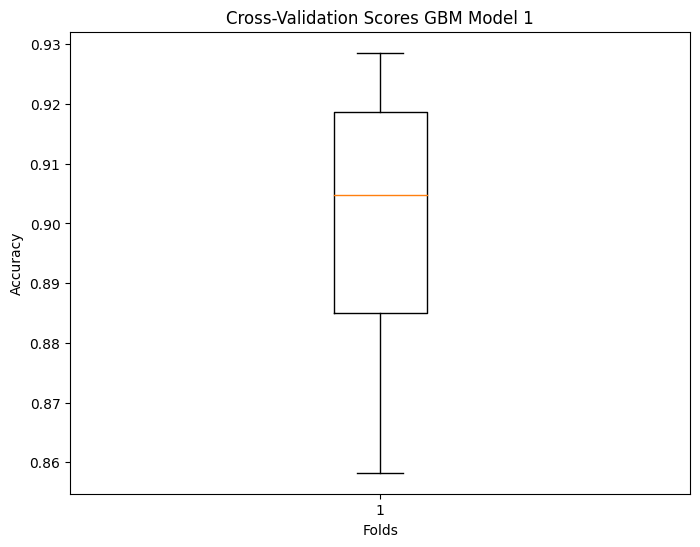

In [ ]:
# Plot box plot of cross-validation scores
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(cv_scoresgbm)
plt.title('Cross-Validation Scores GBM Model 1')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
# Extract features for testing
X_test_data = df_metadata_test.drop(columns=['activity', 'user_snippet'])
# Make predictions on the test data
predictions_gbm = gbm.predict(X_test_data)


# Evaluate the accuracy of the model
y_test_data = df_metadata_test['activity']
accuracy_test = accuracy_score(y_test_data, predictions_gbm)
print("Accuracy:", accuracy)

Accuracy: 0.9405705229793978


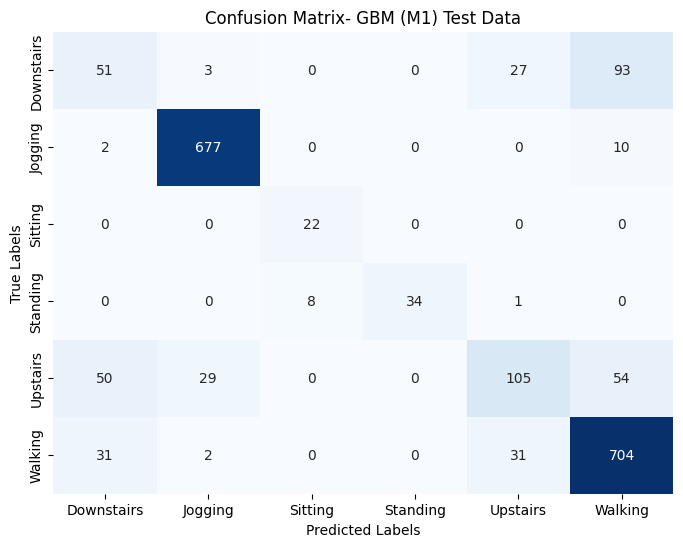

In [ ]:
import matplotlib.pyplot as plt


# Get unique labels
labels = sorted(y_test_data.unique())

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_data, predictions_gbm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix- GBM (M1) Test Data")
plt.show()

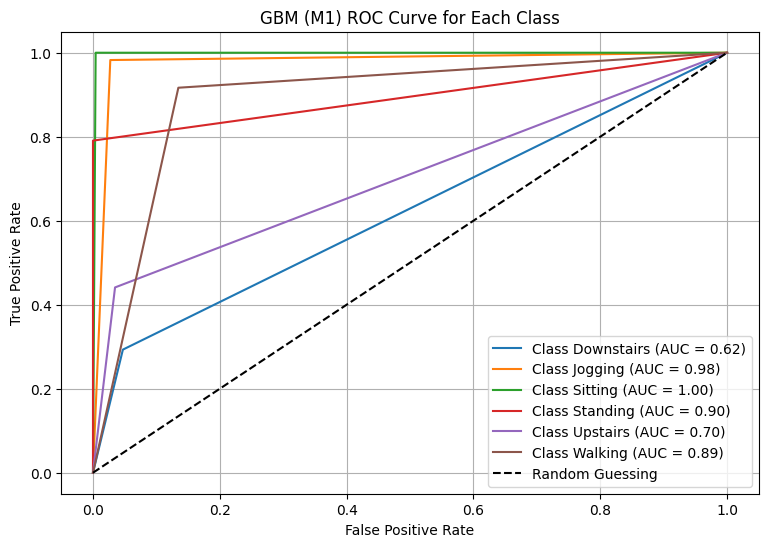

In [ ]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curve for each class
plt.figure(figsize=(9, 6))
for label in labels:
    fpr, tpr, _ = roc_curve(y_test_data == label, predictions_gbm == label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GBM (M1) ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from tabulate import tabulate
class_report_str = classification_report(y_test_data, predictions_gbm)

# Convert the classification report string to a list of lines
class_report_lines = class_report_str.split('\n')

# Remove empty lines and headers
class_report_lines = [line.split() for line in class_report_lines if line.strip() and line.strip() != 'precision']

# Print the classification report table
headers = class_report_lines[0]
data = class_report_lines[1:]

print("Classification Report of GBM")
print(tabulate(data, headers=headers, tablefmt='grid'))

Classification Report of GBM
+------------+-------------+----------+------------+-----------+
|            | precision   |   recall |   f1-score |   support |
+============+=============+==========+============+===========+
| Downstairs | 0.38        |     0.29 |       0.33 |    174    |
+------------+-------------+----------+------------+-----------+
| Jogging    | 0.95        |     0.98 |       0.97 |    689    |
+------------+-------------+----------+------------+-----------+
| Sitting    | 0.73        |     1    |       0.85 |     22    |
+------------+-------------+----------+------------+-----------+
| Standing   | 1.00        |     0.79 |       0.88 |     43    |
+------------+-------------+----------+------------+-----------+
| Upstairs   | 0.64        |     0.44 |       0.52 |    238    |
+------------+-------------+----------+------------+-----------+
| Walking    | 0.82        |     0.92 |       0.86 |    768    |
+------------+-------------+----------+------------+---------

In [ ]:
X_kaggle = df_metadata_kaggle.iloc[:, 1:]  # Exclude the first column (user_snippet)
#df_metadata_kaggle.head()


In [ ]:
predictions_kaggle = gbm.predict(X_kaggle)

# Add predictions to the Kaggle data
df_metadata_kaggle['predicted_activity'] = predictions_kaggle


# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions_sandbox5.csv'

# Save predictions to a CSV file with specified columns
columns_to_save = ['user_snippet', 'prediction']
df_metadata_kaggle[columns_to_save].to_csv(predictions_file_path, index=False)

print("Predictions saved to:", predictions_file_path)

Predictions saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions_sandbox5.csv


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100],
    'learning_rate': [ 0.01, 0.8],
    'max_depth': [5, 8]
}

In [ ]:
# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=42)
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
# Perform grid search on the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.8], 'max_depth': [5, 8],
                         'n_estimators': [100]},
             scoring='accuracy')

In [ ]:
# Get the best estimator from the grid search
best_gbm = grid_search.best_estimator_

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test data
y_pred_test_gbm = best_gbm.predict(X_test)
accuracy_test_gbm = accuracy_score(y_test, y_pred_test_gbm)
print("Accuracy on test data (GBM):", accuracy_test_gbm)

Best hyperparameters: {'learning_rate': 0.8, 'max_depth': 5, 'n_estimators': 100}
Accuracy on test data (GBM): 0.936608557844691


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)  # Define k-fold cross-validation with 5 folds
scores_gbm = cross_val_score(best_gbm , X_train,y_train, cv=kfold)
# Compute the mean and standard deviation of the cross-validation scores
print("Mean accuracy:", scores_gbm.mean())
print("Standard deviation:", scores_gbm.std())


Mean accuracy: 0.9358156529938709
Standard deviation: 0.011991094175425277


In [ ]:
print("Cross-Validation Scores:", scores_gbm)

Cross-Validation Scores: [0.93564356 0.93366337 0.92376238 0.92864222 0.9395441 ]


In [ ]:

# Predict on the test set
y_pred_va = best_gbm.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_va)
print("Accuracy:", accuracy)

Accuracy: 0.936608557844691


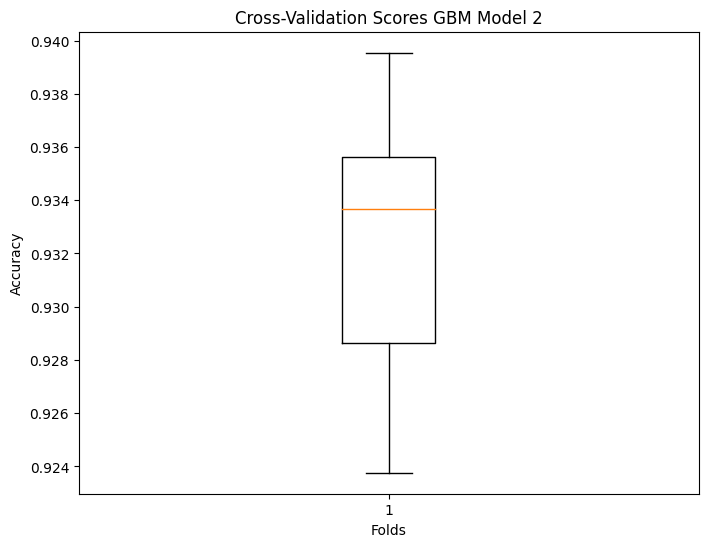

In [ ]:
# Plot box plot of cross-validation scores
plt.figure(figsize=(8, 6))
plt.boxplot(scores_gbm)
plt.title('Cross-Validation Scores GBM Model 2')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
predictions_best_gbm = best_gbm.predict(X_test_data)
y_test_data = df_metadata_test['activity']
# Evaluate the accuracy of the model
accuracy_test = accuracy_score(y_test_data, predictions_best_gbm)
print("Accuracy:", accuracy)

Accuracy: 0.936608557844691


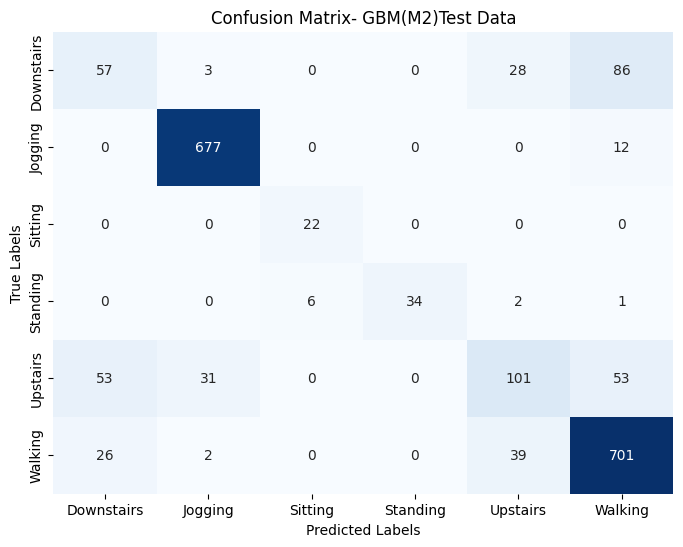

In [ ]:
# Get unique labels
labels = sorted(y_test_data.unique())

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_data, predictions_best_gbm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix- GBM(M2)Test Data")
plt.show()

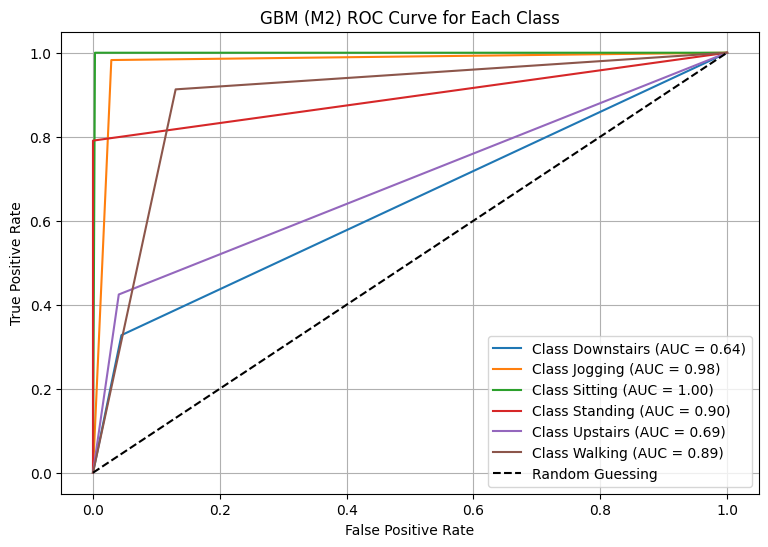

In [ ]:
# Plot ROC curve for each class
plt.figure(figsize=(9, 6))
for label in labels:
    fpr, tpr, _ = roc_curve(y_test_data == label, predictions_best_gbm == label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GBM (M2) ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Make predictions on the Kaggle test data using the trained model
predictions_kaggle = best_gbm.predict(X_kaggle)

# Add predictions to the Kaggle data
df_metadata_kaggle['prediction'] = predictions_kaggle
# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions sandbox5.csv'

#predictions_file_path = '/content/drive/MyDrive/Course Dataset/predictions sandbox6_kaggle.csv'
# Save predictions to a CSV file with specified columns
columns_to_save = ['user_snippet', 'prediction']
df_metadata_kaggle[columns_to_save].to_csv(predictions_file_path, index=False)

print("Predictions saved to:", predictions_file_path)

Predictions saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions sandbox5.csv


In [ ]:
gbm_3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.6, random_state=42, max_depth=5, min_samples_split=2, criterion='squared_error',loss='log_loss', max_features='sqrt')

In [ ]:
# Train the model
gbm_3.fit(X_train, y_train)

# Predict on the test set
y_pred = gbm_3.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9421553090332805


In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)  # Define k-fold cross-validation with 5 folds
cv_scoresgbm3 = cross_val_score(gbm_3, X_test, y_test, cv=kfold)  # Perform cross-validation
print("Cross-Validation Scores:", cv_scoresgbm3)
import numpy as np
print("Mean Cross-Validation Accuracy:", np.mean(cv_scoresgbm3))

Cross-Validation Scores: [0.85770751 0.90909091 0.91269841 0.90873016 0.89285714]
Mean Cross-Validation Accuracy: 0.8962168266516093


In [ ]:

# Make predictions on the test data
predictions_gbm3 = gbm_3.predict(X_test_data)

accuracy_test = accuracy_score(y_test_data, predictions_gbm3)
print("Accuracy:", accuracy)

Accuracy: 0.945324881141046


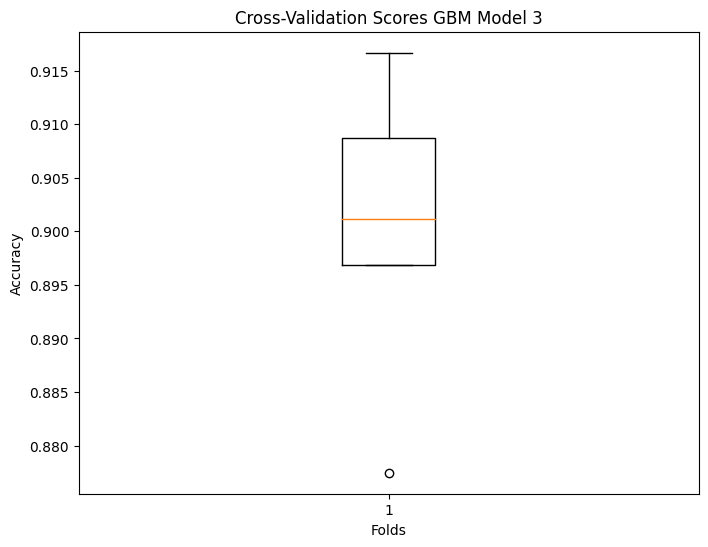

In [ ]:
# Plot box plot of cross-validation scores
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scoresgbm3)
plt.title('Cross-Validation Scores GBM Model 3')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.show()

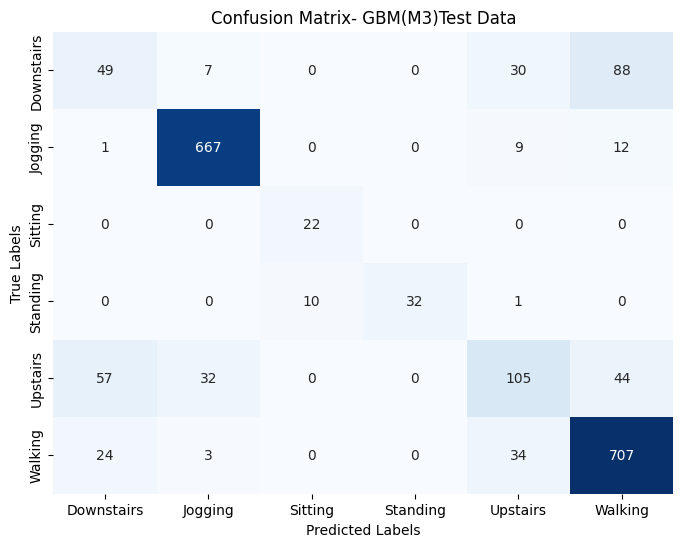

In [ ]:

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_data, predictions_gbm3 )
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix- GBM(M3)Test Data")
plt.show()

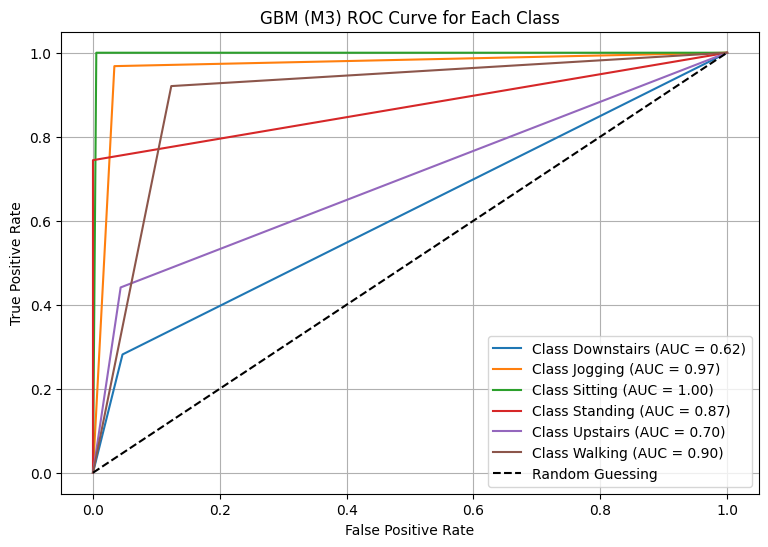

In [ ]:
# Plot ROC curve for each class
plt.figure(figsize=(9, 6))
for label in labels:
    fpr, tpr, _ = roc_curve(y_test_data == label, predictions_gbm3  == label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GBM (M3) ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()